In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.losses import mean_absolute_error

from tensorflow.keras import regularizers

In [ ]:
df=pd.read_csv("drive/MyDrive/dscovr_data.csv")

In [ ]:
df.head()

,Number,Date_Time_UTC,Magnetic_Field_X (nT),Magnetic_Field_Y (nT),Magnetic_Field_Z (nT),Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,...,Spectrum_42,Spectrum_43,Spectrum_44,Spectrum_45,Spectrum_46,Spectrum_47,Spectrum_48,Spectrum_49,Spectrum_50,Kp Index
0,1,2016-01-01 00:00:00,4.433160,-1.247880,-13.165854,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,2,2016-01-01 03:00:00,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,127.960636,124.528563,...,134.080562,151.425344,140.448156,132.193750,151.046906,151.407406,134.467309,162.754562,142.775667,5.3
2,3,2016-01-01 06:00:00,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,129.495920,124.643217,...,131.601167,151.214300,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.0
3,4,2016-01-01 09:00:00,3.758710,-6.973925,3.080465,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3
4,5,2016-01-01 12:00:00,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,130.539498,124.235998,...,133.708920,152.504700,142.948180,129.320420,148.748020,156.235200,136.425440,159.369940,145.061380,1.7


In [ ]:
df.columns

Index(['Number', 'Date_Time_UTC', 'Magnetic_Field_X (nT)',
       'Magnetic_Field_Y (nT)', 'Magnetic_Field_Z (nT)', 'Spectrum_1',
       'Spectrum_2', 'Spectrum_3', 'Spectrum_4', 'Spectrum_5', 'Spectrum_6',
       'Spectrum_7', 'Spectrum_8', 'Spectrum_9', 'Spectrum_10', 'Spectrum_11',
       'Spectrum_12', 'Spectrum_13', 'Spectrum_14', 'Spectrum_15',
       'Spectrum_16', 'Spectrum_17', 'Spectrum_18', 'Spectrum_19',
       'Spectrum_20', 'Spectrum_21', 'Spectrum_22', 'Spectrum_23',
       'Spectrum_24', 'Spectrum_25', 'Spectrum_26', 'Spectrum_27',
       'Spectrum_28', 'Spectrum_29', 'Spectrum_30', 'Spectrum_31',
       'Spectrum_32', 'Spectrum_33', 'Spectrum_34', 'Spectrum_35',
       'Spectrum_36', 'Spectrum_37', 'Spectrum_38', 'Spectrum_39',
       'Spectrum_40', 'Spectrum_41', 'Spectrum_42', 'Spectrum_43',
       'Spectrum_44', 'Spectrum_45', 'Spectrum_46', 'Spectrum_47',
       'Spectrum_48', 'Spectrum_49', 'Spectrum_50', 'Kp Index'],
      dtype='object')

In [ ]:
df['Kp Index'].value_counts()

0.7    2355
0.3    2278
1.0    2127
1.3    1947
2.0    1620
1.7    1467
2.3    1375
0.0    1240
2.7    1201
3.0    1042
3.3     721
3.7     606
4.0     446
4.3     278
1.7     258
4.7     213
5.0     118
5.3      51
5.7      47
6.0      25
6.3      24
5.3      16
5.7      13
6.7      11
7.0       5
7.3       5
8.0       3
7.7       2
8.3       2
Name: Kp Index, dtype: int64

In [ ]:
df.drop(columns=['Number','Date_Time_UTC'],inplace=True)


In [ ]:
neuraldf=df.copy()

In [ ]:
neuraldf

,Magnetic_Field_X (nT),Magnetic_Field_Y (nT),Magnetic_Field_Z (nT),Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_42,Spectrum_43,Spectrum_44,Spectrum_45,Spectrum_46,Spectrum_47,Spectrum_48,Spectrum_49,Spectrum_50,Kp Index
0,4.433160,-1.247880,-13.165854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,127.960636,124.528563,108.572063,108.378163,...,134.080562,151.425344,140.448156,132.193750,151.046906,151.407406,134.467309,162.754562,142.775667,5.3
2,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,129.495920,124.643217,96.828230,90.773630,...,131.601167,151.214300,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.0
3,3.758710,-6.973925,3.080465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3
4,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,130.539498,124.235998,73.482044,79.054954,...,133.708920,152.504700,142.948180,129.320420,148.748020,156.235200,136.425440,159.369940,145.061380,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19491,4.527340,-0.300102,0.244972,1.264590,0.231726,0.392370,0.231726,0.232078,0.231726,0.231726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7
19492,3.569858,1.563384,1.443822,1.263190,0.231726,0.354059,0.231726,0.231726,0.231726,0.231726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
19493,4.224378,0.180576,-0.906981,1.123050,0.231726,0.886440,0.353309,0.397666,0.231726,0.232609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
19494,3.445592,3.224468,-1.600414,0.354338,0.231726,3.591731,20.420421,12.804472,0.238711,0.320107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7


In [ ]:
neuraldf.dropna(inplace=True)

In [ ]:
neuraldf=neuraldf.reset_index(drop=True)

In [ ]:
neuraldf

,Magnetic_Field_X (nT),Magnetic_Field_Y (nT),Magnetic_Field_Z (nT),Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_42,Spectrum_43,Spectrum_44,Spectrum_45,Spectrum_46,Spectrum_47,Spectrum_48,Spectrum_49,Spectrum_50,Kp Index
0,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,127.960636,124.528563,108.572063,108.378163,...,134.080562,151.425344,140.448156,132.193750,151.046906,151.407406,134.467309,162.754562,142.775667,5.3
1,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,129.495920,124.643217,96.828230,90.773630,...,131.601167,151.214300,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.0
2,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,130.539498,124.235998,73.482044,79.054954,...,133.708920,152.504700,142.948180,129.320420,148.748020,156.235200,136.425440,159.369940,145.061380,1.7
3,5.987184,-5.670084,0.123970,143.002722,103.196814,127.037270,130.115054,124.606150,92.997796,98.774156,...,133.008339,152.219311,143.986322,130.524861,149.359044,156.715472,136.748256,159.907328,145.168856,1.0
4,4.177648,-1.696730,-0.348509,132.232489,109.701154,141.846061,131.416072,119.297978,114.855887,128.623580,...,135.650022,155.411300,141.842911,135.279928,157.223850,154.510806,134.327556,165.533494,146.068850,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,4.030534,-3.246504,2.368530,29.964617,9.404130,123.116092,44.761216,10.734829,4.337158,10.234869,...,284.108961,339.384476,340.848187,255.531544,294.599894,329.885774,356.351400,391.341000,424.277500,0.7
238,4.820245,-4.335788,2.544025,51.361972,9.905590,118.861261,36.206065,11.357236,6.296101,10.012311,...,295.348148,344.571940,337.735310,250.528390,298.099761,330.809300,342.764885,435.397000,314.381000,0.3
239,5.710651,-3.204793,2.716816,49.826508,6.355251,125.878918,38.426917,8.329762,2.857918,6.021962,...,303.437926,346.811731,356.281059,242.575118,242.698294,286.446417,334.811364,357.660000,331.971000,0.3
240,5.372567,-5.670201,-0.892112,2.418012,0.857020,1.395573,0.342002,1.069389,0.741980,1.061631,...,337.394000,410.968000,385.708000,331.177000,370.025000,380.402000,398.143000,413.707000,381.806000,1.7


In [ ]:
len(neuraldf)

242

In [ ]:
X=neuraldf.drop('Kp Index',axis=1)
y=neuraldf['Kp Index']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

# Transform your entire DataFrame
df_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [ ]:
df_scaled

,Magnetic_Field_X (nT),Magnetic_Field_Y (nT),Magnetic_Field_Z (nT),Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_41,Spectrum_42,Spectrum_43,Spectrum_44,Spectrum_45,Spectrum_46,Spectrum_47,Spectrum_48,Spectrum_49,Spectrum_50
0,1.024238,-1.134412,-4.321824,-0.183556,0.008185,-0.257334,-0.232031,-0.344595,-0.346090,-0.434541,...,-0.970931,-0.891230,-0.977690,-0.958095,-0.897911,-0.897895,-0.905932,-0.916451,-0.966604,-0.879058
1,1.310460,-1.654171,-3.103543,-0.161585,-0.020587,-0.283639,-0.224489,-0.344063,-0.397410,-0.504837,...,-0.963430,-0.901567,-0.978540,-0.943539,-0.908279,-0.911787,-0.885636,-0.905330,-0.983085,-0.872807
2,1.939450,-1.799344,-0.426048,-0.170191,-0.022471,-0.276934,-0.219363,-0.345954,-0.499432,-0.551631,...,-0.967101,-0.892779,-0.973342,-0.948477,-0.909144,-0.906879,-0.887316,-0.908913,-0.979306,-0.870449
3,1.781910,-1.637687,0.006679,-0.165592,-0.020023,-0.280204,-0.221448,-0.344235,-0.414149,-0.472891,...,-0.964423,-0.895700,-0.974492,-0.944483,-0.904435,-0.904491,-0.885465,-0.907670,-0.977289,-0.870044
4,1.241796,-0.530292,-0.217862,-0.218390,0.015642,-0.207226,-0.215057,-0.368888,-0.318630,-0.353700,...,-0.979837,-0.884686,-0.961634,-0.952730,-0.885847,-0.873756,-0.893966,-0.916989,-0.956175,-0.866654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.197885,-0.962222,1.073384,-0.719731,-0.534317,-0.299528,-0.640719,-0.873083,-0.801590,-0.826433,...,-0.143838,-0.265729,-0.220543,-0.187118,-0.415761,-0.336911,-0.217730,-0.062283,-0.108755,0.181230
238,1.433599,-1.265811,1.156786,-0.614836,-0.531567,-0.320495,-0.682744,-0.870193,-0.793030,-0.827322,...,-0.108866,-0.218871,-0.199646,-0.199094,-0.435319,-0.323234,-0.214169,-0.114586,0.056581,-0.232700
239,1.699370,-0.950597,1.238903,-0.622363,-0.551035,-0.285912,-0.671835,-0.884253,-0.808055,-0.843256,...,-0.070002,-0.185143,-0.190624,-0.127745,-0.466410,-0.539735,-0.385230,-0.145204,-0.235154,-0.166446
240,1.598458,-1.637720,-0.476204,-0.854771,-0.581183,-0.899366,-0.858914,-0.917972,-0.817301,-0.863063,...,0.015941,-0.043573,0.067814,-0.014534,-0.120048,-0.042161,-0.022943,0.098598,-0.024819,0.021259


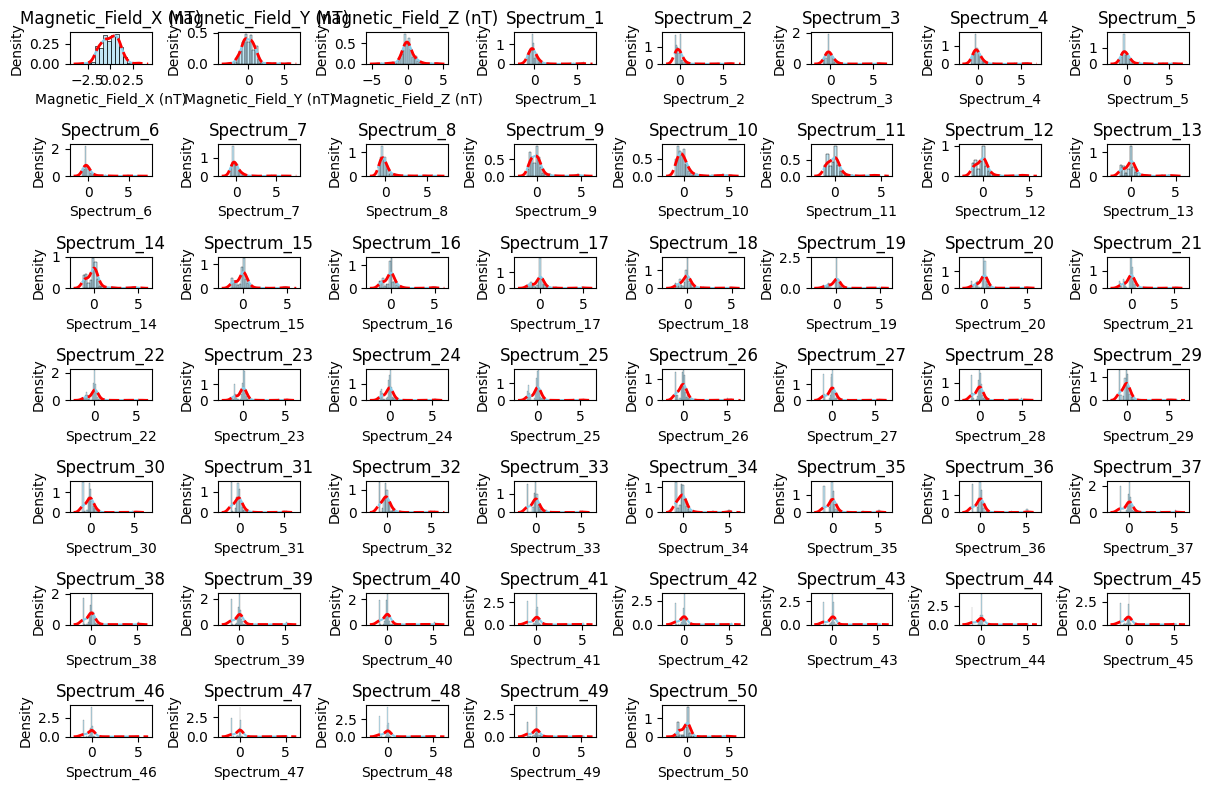

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Create an instance of StandardScaler

# Fit and transform your entire DataFrame

# Get the number of columns in the DataFrame
num_columns = len(df_scaled.columns)

# Set the layout to be square for better visualization
rows = int(num_columns**0.5)
cols = int((num_columns + rows - 1) / rows)

# Plot histograms for each column with overlaid normal distribution curve
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df_scaled[column], kde=True, stat='density', color='skyblue')
    sns.kdeplot(df_scaled[column], color='red', linestyle='dashed', linewidth=2)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape[1]

53

In [ ]:
def build_model_using_sequential():
  model = Sequential([
    Dense(32, kernel_initializer='normal', activation='relu',input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(12, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(12, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [ ]:
model = build_model_using_sequential()

In [ ]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import r2_score

In [ ]:
from tensorflow.keras.layers import *

In [ ]:


#Create a simple feedforward neural network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))

#Compile the model
mse = MeanSquaredError()
model.compile(loss=mse, optimizer=Adam(learning_rate=0.001), metrics=[mse])
#Train the model
training = model.fit(X_train, y_train, epochs=96, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/96
4/4 [==============================] - 1s 77ms/step - loss: 5.2696 - mean_squared_error: 5.1723 - val_loss: 4.4548 - val_mean_squared_error: 4.4548
Epoch 2/96
4/4 [==============================] - 0s 18ms/step - loss: 3.4188 - mean_squared_error: 2.7313 - val_loss: 3.8998 - val_mean_squared_error: 3.8998
Epoch 3/96
4/4 [==============================] - 0s 13ms/step - loss: 3.2640 - mean_squared_error: 2.5439 - val_loss: 3.6335 - val_mean_squared_error: 3.6335
Epoch 4/96
4/4 [==============================] - 0s 12ms/step - loss: 2.7505 - mean_squared_error: 2.1041 - val_loss: 3.4124 - val_mean_squared_error: 3.4124
Epoch 5/96
4/4 [==============================] - 0s 13ms/step - loss: 2.5096 - mean_squared_error: 1.9053 - val_loss: 3.1681 - val_mean_squared_error: 3.1681
Epoch 6/96
4/4 [==============================] - 0s 13ms/step - loss: 2.3333 - mean_squared_error: 1.7635 - val_loss: 2.9083 - val_mean_squared_error: 2.9083
Epoch 7/96
4/4 [==============================

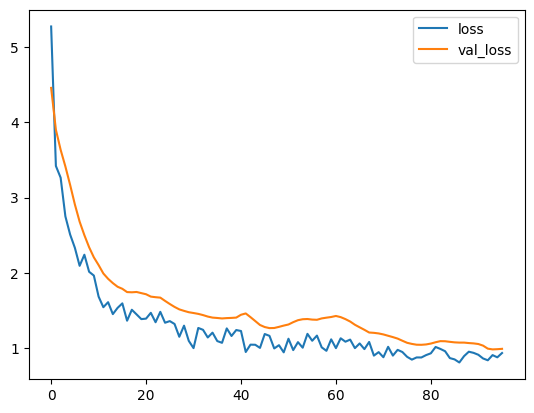

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.show()

In [ ]:
X_test['prediction'] = model.predict(X_test)


2/2 [==============================] - 0s 4ms/step


In [ ]:
X_test.shape

(49, 54)

In [ ]:
neuraldf[:7]

,Magnetic_Field_X (nT),Magnetic_Field_Y (nT),Magnetic_Field_Z (nT),Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_42,Spectrum_43,Spectrum_44,Spectrum_45,Spectrum_46,Spectrum_47,Spectrum_48,Spectrum_49,Spectrum_50,Kp Index
1,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,127.960636,124.528563,108.572063,108.378163,...,134.080562,151.425344,140.448156,132.193750,151.046906,151.407406,134.467309,162.754562,142.775667,5.3
2,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,129.495920,124.643217,96.828230,90.773630,...,131.601167,151.214300,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.0
4,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,130.539498,124.235998,73.482044,79.054954,...,133.708920,152.504700,142.948180,129.320420,148.748020,156.235200,136.425440,159.369940,145.061380,1.7
5,5.987184,-5.670084,0.123970,143.002722,103.196814,127.037270,130.115054,124.606150,92.997796,98.774156,...,133.008339,152.219311,143.986322,130.524861,149.359044,156.715472,136.748256,159.907328,145.168856,1.0
6,4.177648,-1.696730,-0.348509,132.232489,109.701154,141.846061,131.416072,119.297978,114.855887,128.623580,...,135.650022,155.411300,141.842911,135.279928,157.223850,154.510806,134.327556,165.533494,146.068850,2.0
7,4.333895,-3.248614,1.231803,137.545792,104.065123,136.477416,136.641960,125.444673,108.865335,122.723277,...,130.378340,156.607961,146.339650,132.358592,152.868466,157.470961,136.372845,161.160835,145.254961,1.7
9,6.177589,-4.533535,-0.686191,145.215081,120.884500,127.242371,117.981339,133.656710,127.607677,113.635484,...,133.314419,147.599823,147.939419,141.826129,149.144468,150.436984,145.019500,165.553742,136.370694,2.3


In [ ]:
predictdf=X_test.copy()

In [ ]:
predictdf

,Magnetic_Field_X (nT),Magnetic_Field_Y (nT),Magnetic_Field_Z (nT),Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_42,Spectrum_43,Spectrum_44,Spectrum_45,Spectrum_46,Spectrum_47,Spectrum_48,Spectrum_49,Spectrum_50,prediction
24,-0.838125,0.446228,-0.763690,-0.167705,0.027626,-0.305591,-0.294113,-0.324787,-0.309347,-0.445050,...,-0.845084,-0.965925,-0.945046,-0.884979,-0.912524,-0.901586,-0.895788,-0.973468,-0.894046,2.623369
6,1.838742,-1.320925,-0.378342,-0.154746,0.076964,-0.279193,-0.281051,-0.302202,-0.262906,-0.413549,...,-0.894424,-0.993100,-0.929275,-0.860257,-0.905329,-0.909674,-0.875829,-0.956099,-0.903182,2.089997
152,0.515520,-0.346145,0.208763,0.267313,-0.177048,-0.167675,-0.414039,-0.491283,-0.475448,-0.416480,...,-0.011941,0.091512,0.060106,0.083371,-0.016955,0.009308,0.000988,0.115782,0.321520,1.137325
209,0.994197,-0.044261,-0.448086,-0.342436,-0.437701,-0.419909,-0.418659,-0.381477,-0.303899,-0.214318,...,0.035905,-0.054651,-0.236080,-0.213140,-0.215095,-0.198587,-0.111188,0.009197,0.397602,1.666515
237,1.197885,-0.962222,1.073384,-0.719731,-0.534317,-0.299528,-0.640719,-0.873083,-0.801590,-0.826433,...,-0.265729,-0.220543,-0.187118,-0.415761,-0.336911,-0.217730,-0.062283,-0.108755,0.181230,2.454766
199,-1.144018,4.300174,0.467425,-0.566401,-0.462002,-0.256103,-0.379206,-0.575740,-0.563498,-0.529278,...,-0.029818,0.086926,0.160573,0.244996,0.291416,0.246554,0.213077,0.069919,-0.225554,6.282743
190,0.147002,-0.645161,-0.837190,-0.443018,-0.490207,-0.460211,-0.527017,-0.553865,-0.600124,-0.618285,...,-0.108586,-0.119411,-0.274031,-0.264375,-0.279477,-0.204376,-0.136913,-0.066888,0.396422,2.661990
150,0.187357,-1.160197,-0.280382,-0.210382,-0.325725,-0.222385,-0.198229,-0.210884,-0.256864,-0.225880,...,0.034329,0.084705,0.040343,0.048676,0.074305,0.111128,0.092220,0.075694,0.181281,1.054313
9,-1.501310,0.277192,0.224574,-0.135475,0.023004,-0.293211,-0.223755,-0.285395,-0.310429,-0.424899,...,-0.911784,-0.982192,-0.920252,-0.876498,-0.915786,-0.891518,-0.877571,-0.974548,-0.892514,1.475364
113,0.441760,-0.812992,-0.882922,-0.113824,-0.289891,-0.083971,-0.071178,0.024893,0.242994,0.594968,...,0.084828,0.033896,-0.004315,0.021056,0.032329,0.045356,-0.015366,0.025346,0.020610,0.795774


In [ ]:
predictdf.isna().sum()

Magnetic_Field_X (nT)    0
Magnetic_Field_Y (nT)    0
Magnetic_Field_Z (nT)    0
Spectrum_1               0
Spectrum_2               0
Spectrum_3               0
Spectrum_4               0
Spectrum_5               0
Spectrum_6               0
Spectrum_7               0
Spectrum_8               0
Spectrum_9               0
Spectrum_10              0
Spectrum_11              0
Spectrum_12              0
Spectrum_13              0
Spectrum_14              0
Spectrum_15              0
Spectrum_16              0
Spectrum_17              0
Spectrum_18              0
Spectrum_19              0
Spectrum_20              0
Spectrum_21              0
Spectrum_22              0
Spectrum_23              0
Spectrum_24              0
Spectrum_25              0
Spectrum_26              0
Spectrum_27              0
Spectrum_28              0
Spectrum_29              0
Spectrum_30              0
Spectrum_31              0
Spectrum_32              0
Spectrum_33              0
Spectrum_34              0
S

In [ ]:
predictsorted=predictdf.sort_index()

In [ ]:
predictsorted

,Magnetic_Field_X (nT),Magnetic_Field_Y (nT),Magnetic_Field_Z (nT),Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_42,Spectrum_43,Spectrum_44,Spectrum_45,Spectrum_46,Spectrum_47,Spectrum_48,Spectrum_49,Spectrum_50,prediction
6,1.838742,-1.320925,-0.378342,-0.154746,0.076964,-0.279193,-0.281051,-0.302202,-0.262906,-0.413549,...,-0.894424,-0.993100,-0.929275,-0.860257,-0.905329,-0.909674,-0.875829,-0.956099,-0.903182,2.089997
9,-1.501310,0.277192,0.224574,-0.135475,0.023004,-0.293211,-0.223755,-0.285395,-0.310429,-0.424899,...,-0.911784,-0.982192,-0.920252,-0.876498,-0.915786,-0.891518,-0.877571,-0.974548,-0.892514,1.475364
10,-1.908813,0.112621,-0.428823,-0.115502,0.029130,-0.309943,-0.227260,-0.265758,-0.305563,-0.439607,...,-0.917979,-0.988465,-0.914061,-0.869507,-0.914617,-0.891415,-0.873932,-0.973330,-0.892066,1.826658
15,-1.334608,0.483452,0.225456,-0.131118,0.071205,-0.310980,-0.283586,-0.281949,-0.270908,-0.466709,...,-0.906131,-1.004599,-0.927221,-0.854860,-0.909388,-0.913509,-0.880082,-0.958083,-0.907589,1.687722
16,-0.723420,1.496765,0.932685,-0.166348,0.111597,-0.259954,-0.299496,-0.304324,-0.231601,-0.430376,...,-0.894565,-0.994342,-0.946391,-0.845970,-0.888246,-0.926770,-0.890652,-0.941722,-0.902495,1.621336
18,-1.577854,1.497917,1.828045,-0.142812,0.066025,-0.286223,-0.264930,-0.292955,-0.274242,-0.418707,...,-0.906178,-0.991912,-0.936028,-0.864067,-0.904877,-0.910316,-0.884079,-0.955813,-0.896704,1.259538
19,-1.281427,2.840172,2.039768,-0.137367,0.077759,-0.287784,-0.269095,-0.285200,-0.272272,-0.425165,...,-0.910042,-0.992317,-0.936677,-0.860232,-0.905097,-0.917615,-0.882962,-0.951860,-0.900646,1.670697
24,-0.838125,0.446228,-0.763690,-0.167705,0.027626,-0.305591,-0.294113,-0.324787,-0.309347,-0.445050,...,-0.845084,-0.965925,-0.945046,-0.884979,-0.912524,-0.901586,-0.895788,-0.973468,-0.894046,2.623369
25,-0.794605,0.448304,-0.108209,-0.181431,0.012408,-0.295062,-0.279619,-0.341250,-0.320456,-0.431188,...,-0.889667,-0.987517,-0.952769,-0.880479,-0.897261,-0.911871,-0.906138,-0.960676,-0.892641,2.073014
30,-0.581230,0.434471,0.268437,-0.206216,0.086807,-0.272637,-0.362058,-0.382847,-0.260871,-0.410554,...,-0.878578,-0.992618,-0.991136,-0.885635,-0.867162,-0.927105,-0.941463,-0.940250,-0.880611,1.842688


In [ ]:
predictsorted['prediction'][:10]

6     2.089997
9     1.475364
10    1.826658
15    1.687722
16    1.621336
18    1.259538
19    1.670697
24    2.623369
25    2.073014
30    1.842688
Name: prediction, dtype: float32

In [ ]:
neuraldf

,Magnetic_Field_X (nT),Magnetic_Field_Y (nT),Magnetic_Field_Z (nT),Spectrum_1,Spectrum_2,Spectrum_3,Spectrum_4,Spectrum_5,Spectrum_6,Spectrum_7,...,Spectrum_42,Spectrum_43,Spectrum_44,Spectrum_45,Spectrum_46,Spectrum_47,Spectrum_48,Spectrum_49,Spectrum_50,Kp Index
0,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,127.960636,124.528563,108.572063,108.378163,...,134.080562,151.425344,140.448156,132.193750,151.046906,151.407406,134.467309,162.754562,142.775667,5.3
1,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,129.495920,124.643217,96.828230,90.773630,...,131.601167,151.214300,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.0
2,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,130.539498,124.235998,73.482044,79.054954,...,133.708920,152.504700,142.948180,129.320420,148.748020,156.235200,136.425440,159.369940,145.061380,1.7
3,5.987184,-5.670084,0.123970,143.002722,103.196814,127.037270,130.115054,124.606150,92.997796,98.774156,...,133.008339,152.219311,143.986322,130.524861,149.359044,156.715472,136.748256,159.907328,145.168856,1.0
4,4.177648,-1.696730,-0.348509,132.232489,109.701154,141.846061,131.416072,119.297978,114.855887,128.623580,...,135.650022,155.411300,141.842911,135.279928,157.223850,154.510806,134.327556,165.533494,146.068850,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,4.030534,-3.246504,2.368530,29.964617,9.404130,123.116092,44.761216,10.734829,4.337158,10.234869,...,284.108961,339.384476,340.848187,255.531544,294.599894,329.885774,356.351400,391.341000,424.277500,0.7
238,4.820245,-4.335788,2.544025,51.361972,9.905590,118.861261,36.206065,11.357236,6.296101,10.012311,...,295.348148,344.571940,337.735310,250.528390,298.099761,330.809300,342.764885,435.397000,314.381000,0.3
239,5.710651,-3.204793,2.716816,49.826508,6.355251,125.878918,38.426917,8.329762,2.857918,6.021962,...,303.437926,346.811731,356.281059,242.575118,242.698294,286.446417,334.811364,357.660000,331.971000,0.3
240,5.372567,-5.670201,-0.892112,2.418012,0.857020,1.395573,0.342002,1.069389,0.741980,1.061631,...,337.394000,410.968000,385.708000,331.177000,370.025000,380.402000,398.143000,413.707000,381.806000,1.7


In [ ]:

selected_indexes = [6, 9, 10, 15, 16, 18, 19, 24, 25, 30]
target_column = 'Kp Index'
selected_rows = neuraldf.loc[selected_indexes, [target_column]]

# Display the result
selected_rows

,Kp Index
6,2.3
9,1.7
10,1.3
15,0.7
16,1.0
18,2.0
19,2.3
24,2.7
25,2.7
30,2.3
